## Introduction to Machine Learning with Python - part6
#### Scikit-learn을 중심으로 ML 관련 내용을 정리하였습니다. 파이썬 라이브러리를 활용한 머신러닝(번역개정2판, 안드레아스 뮐러, 세라 가이도 지음)을 참고하였습니다.

## 7. 텍스트 데이터 다루기
### 7.1 문자열 데이터 타입
#### 범주형 데이터 : 고정된 목록
#### 범주에 의미를 연결시킬 수 있는 임의의 문자열 : 텍스트 필드로 받는 응답 / 무한한 갯수의 범주형 데이터이지만 군집화 할 수 있는 데이터로 볼 수 있음 
#### 구조화된 문자열 데이터 ; 핸드폰 번호, 주소, 이메일과 같이 구조를 갖는 데이터
#### 텍스트 데이터 : 자유로운 형태의 절과 문장으로 구성
#### 데이터셋 = 말뭉치 / 하나의 텍스트를 의미하는 데이터 포인트 = 문서

### 7.2 예제 애플리케이션 : 영화 리뷰 감성 분석

In [1]:
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
#### matplotlib 한글 세팅
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import sklearn

In [3]:
from sklearn.datasets import load_files
reviews_train = load_files('./aclImdb/train/')
text_train, y_train = reviews_train.data, reviews_train.target
print('text_train의 타입 : ', type(text_train))
print('text_train의 길이 : ', len(text_train))
print('text_train[6] : \n', text_train[6])

text_train의 타입 :  <class 'list'>
text_train의 길이 :  25000
text_train[6] : 
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [4]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]
print('클래스별 샘플 수 (훈련데이터) : ', np.bincount(y_train))


클래스별 샘플 수 (훈련데이터) :  [12500 12500]


In [5]:
reviews_test = load_files('./aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target
print('테스트 데이터의 문서 수 : ', len(text_test))
print('클래스별 샘플 수 (테스트 데이터) : ', np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수 :  25000
클래스별 샘플 수 (테스트 데이터) :  [12500 12500]


### 7.3 텍스트 데이터를 BOW로 표현하기
#### BOW : 입력 테스트의 구조 대부분을 잃고, 각 단어가 말뭉치에 있는 텍스트에 얼마나 많이 나타나는지만 고려 / 구조와 상관없이 단어의 출현 횟수만 세기 떄문에 텍스트를 담는 '가방'으로 생각
#### 토큰화 -> 어휘 사전 구축 -> 인코딩

#### 7.3.1 샘플 데이터에 BOW 적용하기

In [7]:
bards_words = ['The fool doth think he is wise,',
              'but the wise man knows himself to be a fool']

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)
print('어휘 사전의 크기 : ', len(vect.vocabulary_))
print('어휘 사전의 내용 : \n', vect.vocabulary_)

어휘 사전의 크기 :  13
어휘 사전의 내용 : 
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [9]:
bag_of_words = vect.transform(bards_words)
print("BOW : ", repr(bag_of_words))
print('BOW의 밀집 표현 : \n', bag_of_words.toarray())

BOW :  <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>
BOW의 밀집 표현 : 
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


#### 7.3.2 영화 리뷰에 대한 BOW

In [10]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print('X_train : \n', repr(X_train))

X_train : 
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [11]:
feature_names = vect.get_feature_names()
print('특성 개수 : ', len(feature_names))
print('처음 20개 특성 : \n', feature_names[:20])
print('20010에서 20030까지 특성 : \n', feature_names[20010:20030])
print('매 2000번째 특성 : \n', feature_names[::2000])

특성 개수 :  74849
처음 20개 특성 : 
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성 : 
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성 : 
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, n_jobs=-1)
print('교차 검증 평균 점수 : {:.2f}'.format(np.mean(scores)))

교차 검증 평균 점수 : 0.88


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid =GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))
print('최적의 매개 변수 : ', grid.best_params_)
X_test = vect.transform(text_test)
print('테스트 점수 : {:.2f}'.format(grid.score(X_test, y_test)))

최상의 교차 검증 점수 : 0.89
최적의 매개 변수 :  {'C': 0.1}
테스트 점수 : 0.88


In [17]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('min_df로 제한한 X_train : ', repr(X_train))

feature_names = vect.get_feature_names()
print('처음 50개 특성 : \n', feature_names[:50])
print('20010에서 20030까지 특성 : \n', feature_names[20010:20030])
print('매 700번째 특성 : \n', feature_names[::700])

min_df로 제한한 X_train :  <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>
처음 50개 특성 : 
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20010에서 20030까지 특성 : 
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성 : 
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 

In [18]:
grid =GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))


최상의 교차 검증 점수 : 0.89


### 7.4 불용어
#### 너무 빈번하여 유용하지 않는 단어를 제외 -> 의미 없는 단어 제거

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('불용어 개수 : ', len(ENGLISH_STOP_WORDS))
print('매 10번째 불용어 : \n', list(ENGLISH_STOP_WORDS)[::10])

불용어 개수 :  318
매 10번째 불용어 : 
 ['whither', 'above', 'why', 'my', 'call', 'de', 'at', 'everything', 'during', 'four', 'in', 'serious', 'on', 'up', 'together', 'yours', 'found', 'while', 'empty', 'ever', 'via', 'to', 'yet', 'they', 'when', 'us', 'with', 'couldnt', 'inc', 'me', 'more', 'will']


In [21]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('불용어가 제거된 X_train: \n', repr(X_train))

불용어가 제거된 X_train: 
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [22]:
grid =GridSearchCV(LogisticRegression(max_iter=5000), param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))


최상의 교차 검증 점수 : 0.88


### 7.5 tf-idf로 데이터 스케일 변경하기
#### tf-idf(단어빈도-역문서빈도) : 말뭉치의 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치 / 의미있는 특성을 추출

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {
    'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]
}
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수 : 0.89


In [25]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())
print('가장 낮은 tfidf를 가진 특성 : \n', feature_names[sorted_by_tfidf[:20]])
print('가장 높은 tfidf를 가진 특성 : \n', feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성 : 
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성 : 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


### 7.6 모델 계수 조사

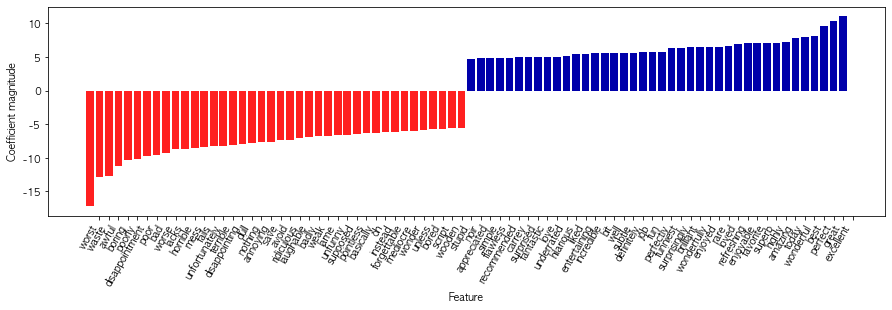

In [26]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0],
                                    feature_names, n_top_features=40)

### 7.7 여러 단어로 만든 BOW(n-gram)
#### n-gram : n개의 연속된 단어를 고려하여 문맥을 고려

In [27]:
print('bards_words : \n', bards_words)

#### 유니그램(n=1)
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print('어휘 사전 크기 : ', len(cv.vocabulary_))
print('어휘 사전 : \n', cv.get_feature_names())

bards_words : 
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']
어휘 사전 크기 :  13
어휘 사전 : 
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [28]:
#### 바이그램(n=2)
cv = CountVectorizer(ngram_ra`nge=(2,2)).fit(bards_words)
print('어휘 사전 크기 : ', len(cv.vocabulary_))
print('어휘 사전 : \n', cv.get_feature_names())

어휘 사전 크기 :  14
어휘 사전 : 
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [30]:
#### 유니그램(n=1) + 바이그램(n=2) + 트리그램(n=3)
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print('어휘 사전 크기 : ', len(cv.vocabulary_))
print('어휘 사전 : \n', cv.get_feature_names())

어휘 사전 크기 :  39
어휘 사전 : 
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [31]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range' : [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, n_jobs=-1)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))
print('최적의 매개 변수 : \n', grid.best_params_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/joblib/parallel.py", line 933, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/joblib/_parallel_backends.py", line 542, in wrap_future_result
    return future.result(timeout=timeout)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/concurrent/futures/_base.py", line 427, in result
    self._condition.wait(timeout)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 296, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/qook/Python/3.7/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-8c39b9ad827d>", line 5, in 

TypeError: object of type 'NoneType' has no len()

In [ ]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
                               xticklabels=param_grid['logisticregression__C'],
                               yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

In [ ]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

### 7.8 고급 토큰화, 어간 추출, 표제어 추출
#### 어간 추출(stemming) : 어미를 찾아 제외하는 규칙 기반 방식
#### 표제어추출(lemmatization) : 알려진 단어의 형태 사전(명시적이고 사람이 구축한시스템)을 사용하고 문장에서 단어의 역할을 고려하는 처리 방식
#### 표제어 : 단어의 표준 형태
#### 정규화(normalization) : 표제어 추출과 어간 추출의 일반화

In [33]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
import spacy 
import nltk

en_nlp = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

def compare_normaliztion(doc):
    doc_spacy = en_nlp(doc)
    print('표제어 : ')
    print([token.lemma_ for token in doc_spacy])
    print("어간 : ")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    
compare_normaliztion(u"Our meeting today was worse than yesterday,"
                    "I'm scared of meeting the clients tommorw.")

표제어 : 
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tommorw', '.']
어간 : 
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tommorw', '.']


### 7.9 토픽 모델링과 문서 군집화 
#### 토픽 모델링 : 비지도 학습으로 문서를 하나 또는 그 이상의 토픽으로 할당하는 작업

#### 7.9.1 LDA(Latent Dirichlet Allocation)
#### 함께 자주 나타나는 단어의 그룹(토픽)을 찾는 것

In [35]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0, n_jobs=-1)
document_topics = lda.fit_transform(X)

print('lda.components_.shape :', lda.components_.shape)

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5, n_words=10)

lda.components_.shape : (10, 10000)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
family        world         comedy        series        saw           
young         us            guy           episode       thought       
real          american      worst         tv            am            
performance   our           thing         episodes      watched       
both          documentary   re            shows         got           
director      history       stupid        season        10            
beautiful     years         actually      new           now           
work          new           laugh         years         book          
us            own           want          television    dvd           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------   